# Outcome regression for bmi

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('./stroke_data_dummies.csv')

In [3]:
df_r = df_raw[df_raw.Gender_Other == 0]

In [4]:
df = df_r.drop(columns = ['Unnamed: 0','id','bmi','Gender_Other'])

In [5]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,marriage,Obesity,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,228.69,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,80.0,0,1,105.92,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,49.0,0,0,171.23,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,79.0,1,0,174.12,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,81.0,0,0,186.21,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [6]:
X = df.drop(columns = ['stroke', 'Obesity'])
X

,age,hypertension,heart_disease,avg_glucose_level,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,228.69,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,80.0,0,1,105.92,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,49.0,0,0,171.23,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,79.0,1,0,174.12,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,81.0,0,0,186.21,1,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,13.0,0,0,103.08,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4905,81.0,0,0,125.20,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4906,35.0,0,0,82.99,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4907,51.0,0,0,166.29,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [7]:
df_0 = df[df['Obesity'] == 0]
df_0 = df_0.drop(columns = ['Obesity'])
df_0

,age,hypertension,heart_disease,avg_glucose_level,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
3,79.0,1,0,174.12,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,81.0,0,0,186.21,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
5,74.0,1,1,70.09,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
6,69.0,0,0,94.39,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
7,78.0,0,0,58.57,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,45.0,0,0,97.95,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1
4902,57.0,0,0,77.93,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
4904,13.0,0,0,103.08,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4907,51.0,0,0,166.29,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [8]:
df_1 = df[df['Obesity'] == 1]
df_1 = df_1.drop(columns = ['Obesity'])
df_1

,age,hypertension,heart_disease,avg_glucose_level,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,228.69,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,80.0,0,1,105.92,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,49.0,0,0,171.23,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1
9,61.0,0,1,120.46,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0
12,50.0,1,0,167.41,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,76.0,0,0,82.35,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1
4898,68.0,0,0,91.68,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1
4903,18.0,0,0,82.85,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4905,81.0,0,0,125.20,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1


In [9]:
y_0 = df_0['stroke']
x_0 = df_0.drop(columns = ['stroke'])

In [10]:
y_1 = df_1['stroke']
x_1 = df_1.drop(columns = ['stroke'])

# Model for controlled group

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [12]:
rfc = RandomForestClassifier(random_state=60)
score_pre_0 = cross_val_score(rfc,x_0,y_0,cv=5).mean()
score_pre_0

0.9618454591799578

nan 1


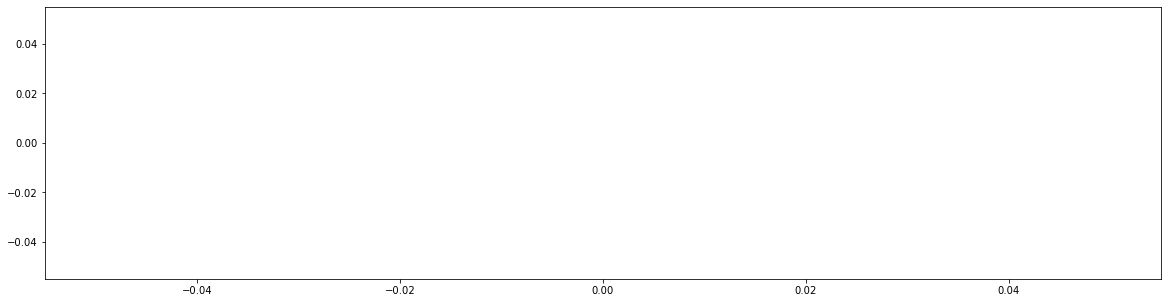

In [13]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

nan 30


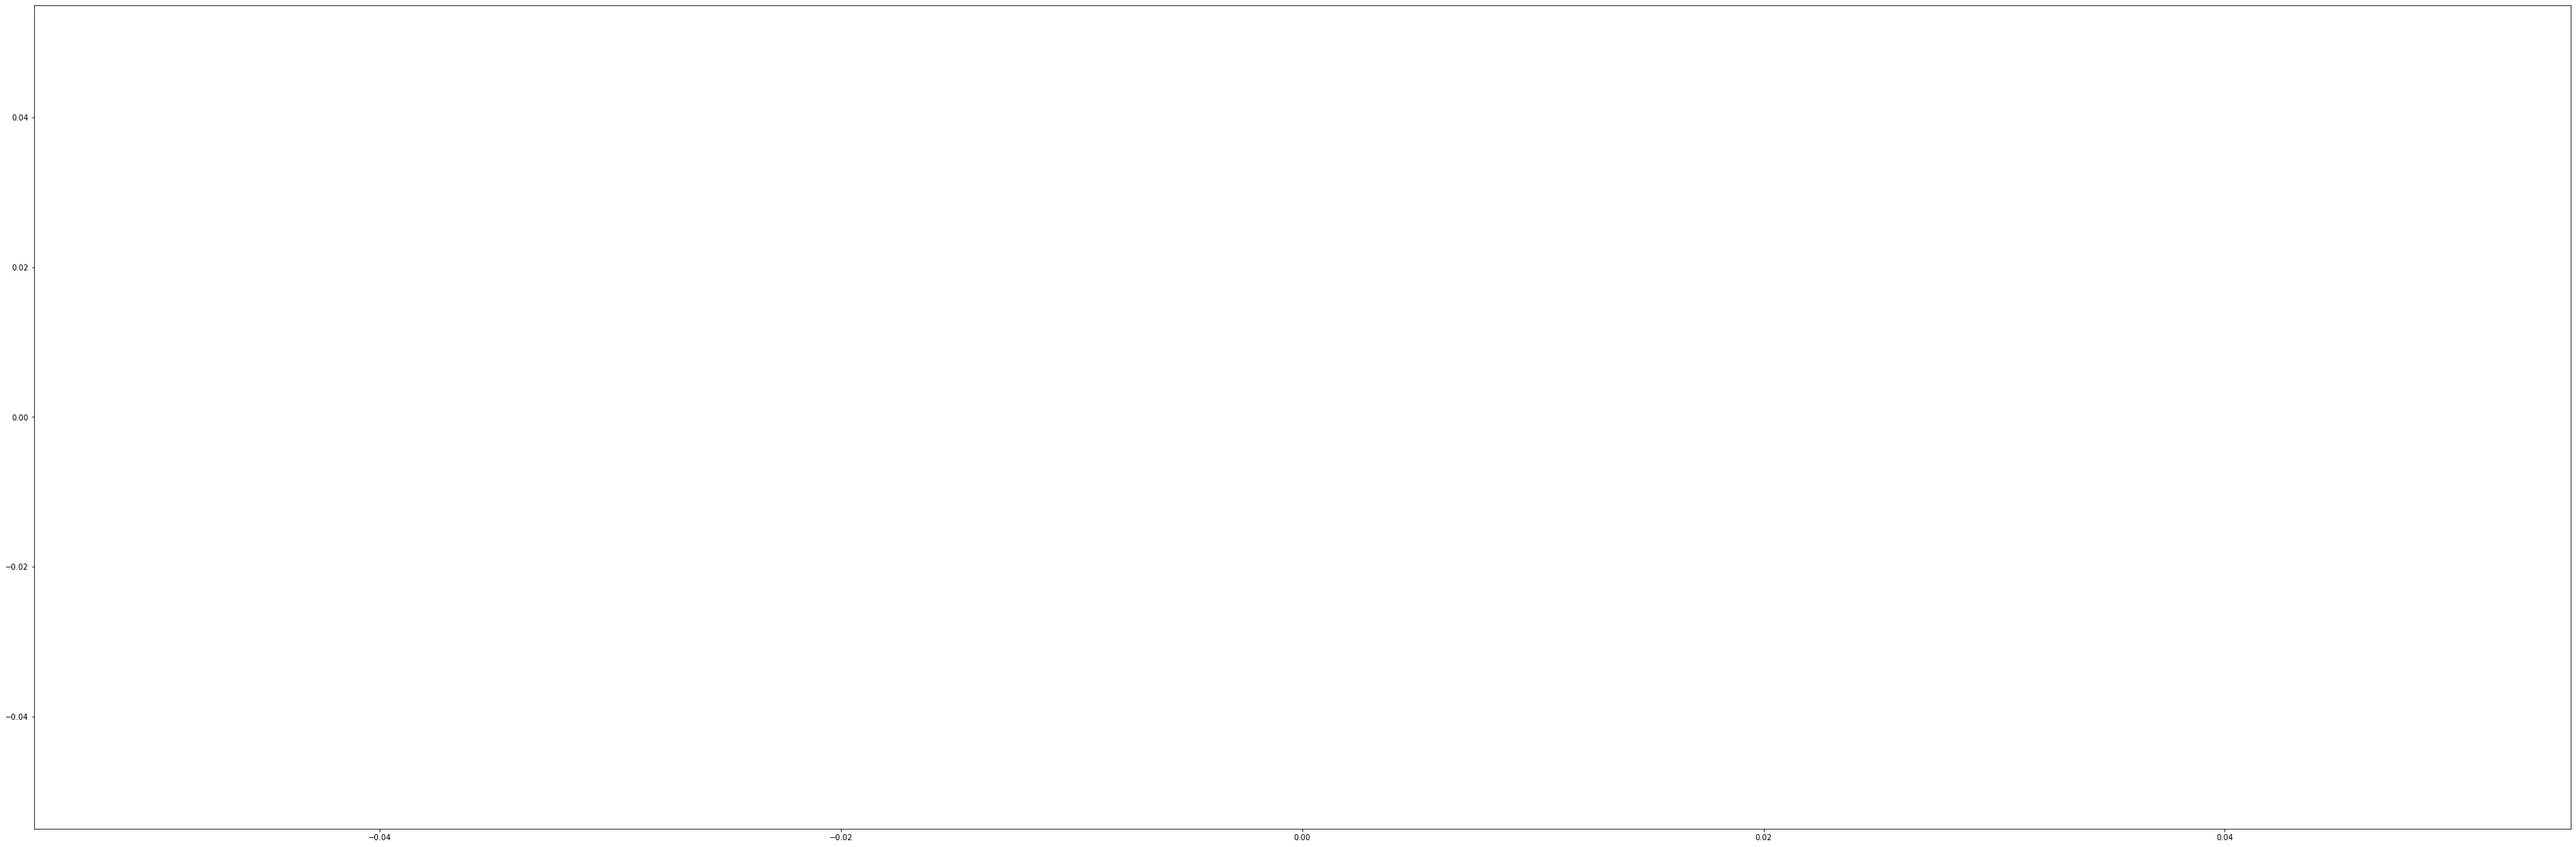

In [14]:
scorel = []
for i in range(30,50):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(30,50)][scorel.index(max(scorel))]))
plt.figure(figsize=[60,20])
plt.plot(range(30,50),scorel)
plt.show()

In [15]:
param_grid = {'max_depth':np.arange(1, 100, 2)}
rfc = RandomForestClassifier(n_estimators=43
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=43, random_state=60),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])})

In [16]:
GS.best_params_

{'max_depth': 7}

In [17]:
GS.best_score_

0.9631866131101438

In [18]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=43
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=43, random_state=60),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [19]:
GS.best_params_

{'max_features': 4}

In [20]:
GS.best_score_

0.9621804675551671

In [21]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=43
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=43, random_state=60),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [22]:
GS.best_params_

{'min_samples_leaf': 3}

In [23]:
GS.best_score_

0.9628516047349344

In [24]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=43
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=43, random_state=60),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [25]:
GS.best_params_

{'min_samples_split': 9}

In [26]:
GS.best_score_

0.9631866131101438

In [27]:
rfc_0 = RandomForestClassifier(n_estimators=43,max_depth = 7,max_features = 4, min_samples_split = 9, random_state=60)
score_0 = cross_val_score(rfc_0,x_0,y_0,cv=5).mean()
score_0

0.9628516047349344

In [28]:
score_0 - score_pre_0

0.0010061455549765785

# Model for treatment gruop

In [29]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre_1 = cross_val_score(rfc,x_1,y_1,cv=5).mean()
score_pre_1

0.9427083333333334

nan 1


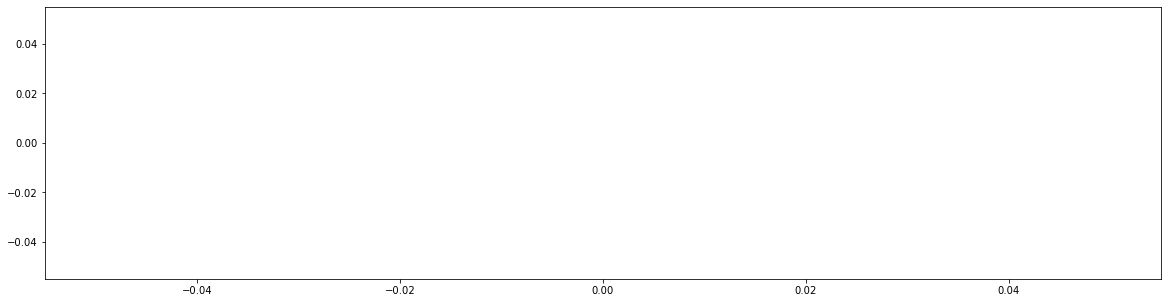

In [30]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

nan 20


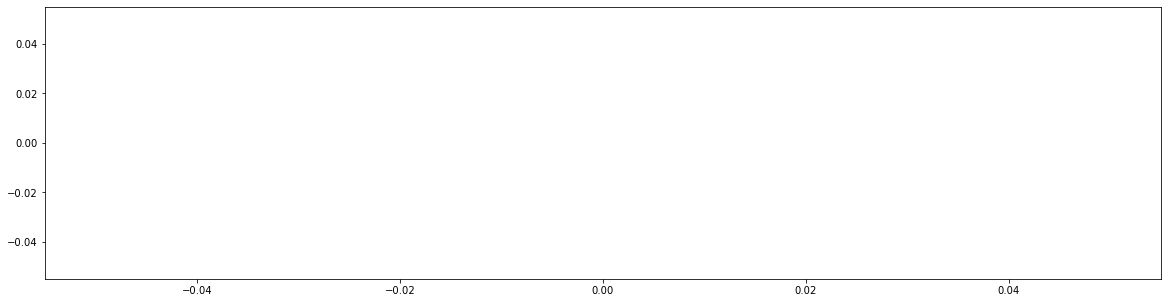

In [31]:
scorel = []
for i in range(20,80):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(20,60)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(20,80),scorel)
plt.show()

In [32]:
param_grid = {'max_depth':np.arange(1, 100, 2)}
rfc = RandomForestClassifier(n_estimators=45
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=45, random_state=80),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])})

In [33]:
GS.best_params_

{'max_depth': 1}

In [34]:
GS.best_score_

0.9489583333333333

In [35]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=45
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=45, random_state=80),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [36]:
GS.best_params_

{'max_features': 3}

In [37]:
GS.best_score_

0.9447916666666666

In [38]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=45
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=45, random_state=80),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [39]:
GS.best_params_

{'min_samples_leaf': 5}

In [40]:
GS.best_score_

0.9489583333333333

In [41]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=45
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=45, random_state=80),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [42]:
GS.best_params_

{'min_samples_split': 9}

In [43]:
GS.best_score_

0.9484375

In [44]:
rfc_1 = RandomForestClassifier(n_estimators=45,max_depth = 1, random_state=80)
score_1 = cross_val_score(rfc_1,x_1,y_1,cv=5).mean()
score_1

0.9489583333333333

In [45]:
score_1 - score_pre_1

0.006249999999999978

# Outcome modeling

In [46]:
from scipy import stats
import scipy.stats

In [47]:
rfc0 = rfc_0.fit(x_0, y_0)

In [48]:
predict_0 = rfc0.predict(X)
mean_0 = predict_0.mean()
mean_0

0.00020374898125509371

In [49]:
rfc1 = rfc_1.fit(x_1, y_1)

In [50]:
predict_1 = rfc1.predict(X)
mean_1 = predict_1.mean()
mean_1

0.0

In [51]:
ATE_outcome = mean_1 - mean_0
ATE_outcome

-0.00020374898125509371

In [52]:
t,pval = scipy.stats.ttest_ind(predict_0,predict_1,equal_var=False,alternative='less')
print(t,pval)

0.9999999999999998 0.8413200916568588


# IPW for bmi

In [53]:
from sklearn.linear_model import LogisticRegression as lr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

In [54]:
# Enabled to remove warnings for demo purposes.
import warnings
warnings.filterwarnings('ignore')

In [55]:
import math
import numpy as np
import pandas as pd
# import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

from scipy import stats

In [56]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [57]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [58]:
# delete row with NA value
df_na = df.dropna()

In [59]:
df_na.reset_index(inplace=True)

In [60]:
pd.isnull(df_na).any()

index                False
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [61]:
df_na

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [62]:
df_na['ever_married'] = df_na.ever_married.map({'Yes':1, 'No':0})
# For gender, 1 means Male, 0 means Female
df_na['gender'] = df_na.gender.map({'Male':1, 'Female':0})
# For Residence_type, 1 means Urban, 0 means Rural
df_na['Residence_type'] = df_na.Residence_type.map({'Urban':1, 'Rural':0})

In [63]:
pd.isnull(df_na).any()
# there is one sample with 'Other' gender'

index                False
id                   False
gender                True
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [64]:
# delete the row with 'gender' value of 'Other'
df_na = df_na.dropna()
df_na.reset_index(drop=True,inplace=True)
pd.isnull(df_na).any()

index                False
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [65]:
df_na

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1.0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,2,31112,1.0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,3,60182,0.0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,4,1665,0.0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,5,56669,1.0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,5104,14180,0.0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
4904,5106,44873,0.0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
4905,5107,19723,0.0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
4906,5108,37544,1.0,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [66]:
def BMI_check(x):
    if x >= 30:
        return 1
    else:
        return 0
    
# Use bmi as treatment. The bound is 30. 1 means higher or equal. 0 means lower.
df_na['treatment_bmi'] = df_na.bmi.apply(BMI_check)

In [67]:
df_data = df_na.drop(columns=['index','id','bmi'])
df_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,treatment_bmi
0,1.0,67.0,0,1,1,Private,1,228.69,formerly smoked,1,1
1,1.0,80.0,0,1,1,Private,0,105.92,never smoked,1,1
2,0.0,49.0,0,0,1,Private,1,171.23,smokes,1,1
3,0.0,79.0,1,0,1,Self-employed,0,174.12,never smoked,1,0
4,1.0,81.0,0,0,1,Private,1,186.21,formerly smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4903,0.0,13.0,0,0,0,children,0,103.08,Unknown,0,0
4904,0.0,81.0,0,0,1,Self-employed,1,125.20,never smoked,0,1
4905,0.0,35.0,0,0,1,Self-employed,0,82.99,never smoked,0,1
4906,1.0,51.0,0,0,1,Private,0,166.29,formerly smoked,0,0


In [68]:
df_encoded = pd.get_dummies(df_data, columns = ['work_type','smoking_status'], \
                           prefix = {'work_type':'work_type', 'smoking_status' : 'smoking_status'}, drop_first=False)
df_encoded

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,treatment_bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0,1,1,1,228.69,1,1,0,0,1,0,0,0,1,0,0
1,1.0,80.0,0,1,1,0,105.92,1,1,0,0,1,0,0,0,0,1,0
2,0.0,49.0,0,0,1,1,171.23,1,1,0,0,1,0,0,0,0,0,1
3,0.0,79.0,1,0,1,0,174.12,1,0,0,0,0,1,0,0,0,1,0
4,1.0,81.0,0,0,1,1,186.21,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0.0,13.0,0,0,0,0,103.08,0,0,0,0,0,0,1,1,0,0,0
4904,0.0,81.0,0,0,1,1,125.20,0,1,0,0,0,1,0,0,0,1,0
4905,0.0,35.0,0,0,1,0,82.99,0,1,0,0,0,1,0,0,0,1,0
4906,1.0,51.0,0,0,1,0,166.29,0,0,0,0,1,0,0,0,1,0,0


In [69]:
df_treatment = df_encoded[df_encoded['treatment_bmi']==1]
df_control = df_encoded[df_encoded['treatment_bmi']==0]

In [70]:
treat_mean = df_treatment.mean()
treat_std = df_treatment.std()
control_mean = df_control.mean()
control_std = df_control.std()

In [71]:
X_list = ['gender','age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','work_type_Govt_job',
          'work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','smoking_status_Unknown',
          'smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
X_descrip = ['0 to Female and 1 to Male','age of the sample','observation of hypertension','observation of heart_disease',
             'Marriage states','0 to Rural and 1 to Urban','average glucose level','Whether is government job',
             'Whether is never worked','Whether job is private','Whether job is self-employed','Whether job is children',
             'Whether smoking status is unknown','Whether is formerly smoked','Whether is never smoked','Whether is smokes']

In [72]:
summary_list = []

for i in range(0, len(X_list)):
    summary_list.append([X_list[i],X_descrip[i],control_mean[X_list[i]],control_std[X_list[i]],treat_mean[X_list[i]],treat_std[X_list[i]],
                    stats.ttest_ind(df_control[X_list[i]], df_treatment[X_list[i]], equal_var=False)[0]])

summary_df = pd.DataFrame(summary_list,columns=
                          ['Label', 'Variable Description','Controls Mean','Controls STD','Treated Mean','Treated STD','t-Statistics'])
summary_df

,Label,Variable Description,Controls Mean,Controls STD,Treated Mean,Treated STD,t-Statistics
0,gender,0 to Female and 1 to Male,0.403614,0.490704,0.419271,0.493568,-1.086971
1,age,age of the sample,38.435181,24.417835,49.768646,17.166306,-19.074881
2,hypertension,observation of hypertension,0.058568,0.234853,0.143750,0.350927,-9.372606
3,heart_disease,observation of heart_disease,0.041165,0.198704,0.062500,0.242125,-3.225694
4,ever_married,Marriage states,0.557229,0.496797,0.801562,0.398927,-18.993364
5,Residence_type,0 to Rural and 1 to Urban,0.508367,0.500014,0.505729,0.500097,0.180334
6,avg_glucose_level,average glucose level,99.631493,37.844651,114.114974,51.861464,-10.562708
7,work_type_Govt_job,Whether is government job,0.111446,0.314736,0.154688,0.361701,-4.296516
8,work_type_Never_worked,Whether is never worked,0.005689,0.075226,0.002604,0.050978,1.712078
9,work_type_Private,Whether job is private,0.524766,0.499470,0.646875,0.478066,-8.580426


In [73]:
df = df_encoded
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,treatment_bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0,1,1,1,228.69,1,1,0,0,1,0,0,0,1,0,0
1,1.0,80.0,0,1,1,0,105.92,1,1,0,0,1,0,0,0,0,1,0
2,0.0,49.0,0,0,1,1,171.23,1,1,0,0,1,0,0,0,0,0,1
3,0.0,79.0,1,0,1,0,174.12,1,0,0,0,0,1,0,0,0,1,0
4,1.0,81.0,0,0,1,1,186.21,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0.0,13.0,0,0,0,0,103.08,0,0,0,0,0,0,1,1,0,0,0
4904,0.0,81.0,0,0,1,1,125.20,0,1,0,0,0,1,0,0,0,1,0
4905,0.0,35.0,0,0,1,0,82.99,0,1,0,0,0,1,0,0,0,1,0
4906,1.0,51.0,0,0,1,0,166.29,0,0,0,0,1,0,0,0,1,0,0


In [74]:
Y = df.stroke

df_data = df.loc[:,df.columns !='stroke']
T = df_data.treatment_bmi
X = df_data.loc[:,df_data.columns !='treatment_bmi']

In [75]:
# Choose age,hypertension,heart_disease,avg_glucose_level as X_b
X_b = ['age','hypertension','heart_disease','avg_glucose_level']

In [76]:
T.mean()
# Since the sample size is unbalanced, we will weighted them in the regression model

0.39119804400978

In [77]:
# weighted based on size ratio of treatment group and control group
model_initial = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.5}))])
model_initial.fit(X.loc[:,X_b], T)

predictions_binary = model_initial.predict(X.loc[:,X_b])
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is: {:.4f}'.format(metrics.f1_score(T, predictions_binary)))

Accuracy: 0.6055

Confusion matrix:
[[1895 1093]
 [ 843 1077]]

F1 score is: 0.5267


In [78]:
likelihood_ratio_table = []
X_l = X_b.copy()

while not likelihood_ratio_table or max([x for x in likelihood_ratio_table[-1].values() if x != '-']) >= 1:
    if likelihood_ratio_table:
        max_likelihood_ratio = max([x for x in likelihood_ratio_table[-1].values() if x != '-'])
        next_label = [key for key in likelihood_ratio_table[-1] if likelihood_ratio_table[-1][key] == max_likelihood_ratio][0]
        X_l.append(next_label)
    model = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.5}))])
    model.fit(X.loc[:,X_l], T)
    step = {}
    for x in X.columns:
        if x in X_l:
            step[x] = '-'
        else:
            X_new = X_l.copy()
            X_new.append(x)
            model_new = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.5}))])
            model_new.fit(X.loc[:,X_new], T)
            
            step[x] = -2*((-metrics.log_loss(T, model.predict_proba(X.loc[:,X_l]))*len(T))
                      -(-metrics.log_loss(T, model_new.predict_proba(X.loc[:,X_new]))*len(T)))
    likelihood_ratio_table.append(step)

In [79]:
linear_terms_list = []
for x in X.columns:
    row = [step[x] for step in likelihood_ratio_table]
    row.insert(0, x)
    linear_terms_list.append(row)
    
columns = ['Label']
for i in range(0,len(likelihood_ratio_table)):
    step = 'Step ' + str(i+1)
    columns.append(step)
    
linear_terms_df = pd.DataFrame(linear_terms_list,columns = columns)
linear_terms_df

,Label,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7
0,gender,1.569423,5.786234,5.734279,5.162963,-,-,-
1,age,-,-,-,-,-,-,-
2,hypertension,-,-,-,-,-,-,-
3,heart_disease,-,-,-,-,-,-,-
4,ever_married,78.561411,35.931638,-,-,-,-,-
5,Residence_type,0.100047,0.064964,0.052424,0.054262,0.046287,0.039798,0.029011
6,avg_glucose_level,-,-,-,-,-,-,-
7,work_type_Govt_job,5.97007,1.604171,0.986685,0.974741,1.011634,0.443847,0.412827
8,work_type_Never_worked,0.076288,2.512238,1.338486,1.273616,1.379935,1.378694,-
9,work_type_Private,55.49972,0.527418,0.484006,0.508618,0.479834,0.179588,0.404223


In [80]:
# The linear terms we need to include
X_l

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'work_type_children',
 'ever_married',
 'smoking_status_formerly smoked',
 'gender',
 'work_type_Self-employed',
 'work_type_Never_worked']

In [81]:
model_linear = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.5}))])
model_linear.fit(X.loc[:,X_l], T)

predictions_binary = model_linear.predict(X.loc[:,X_l])
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is: {:.4f}'.format(metrics.f1_score(T, predictions_binary)))

Accuracy: 0.6037

Confusion matrix:
[[1506 1482]
 [ 463 1457]]

F1 score is: 0.5997


In [82]:
X_copy = X.loc[:,X_l]

for i in range(0, len(X_l)):
    j = i
    while j < len(X_l):
        X_copy[X_l[i]+'*'+X_l[j]] = X_copy[X_l[i]] * X_copy[X_l[j]]
        j += 1

X_copy

,age,hypertension,heart_disease,avg_glucose_level,work_type_children,ever_married,smoking_status_formerly smoked,gender,work_type_Self-employed,work_type_Never_worked,...,smoking_status_formerly smoked*smoking_status_formerly smoked,smoking_status_formerly smoked*gender,smoking_status_formerly smoked*work_type_Self-employed,smoking_status_formerly smoked*work_type_Never_worked,gender*gender,gender*work_type_Self-employed,gender*work_type_Never_worked,work_type_Self-employed*work_type_Self-employed,work_type_Self-employed*work_type_Never_worked,work_type_Never_worked*work_type_Never_worked
0,67.0,0,1,228.69,0,1,1,1.0,0,0,...,1,1.0,0,0,1.0,0.0,0.0,0,0,0
1,80.0,0,1,105.92,0,1,0,1.0,0,0,...,0,0.0,0,0,1.0,0.0,0.0,0,0,0
2,49.0,0,0,171.23,0,1,0,0.0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0,0,0
3,79.0,1,0,174.12,0,1,0,0.0,1,0,...,0,0.0,0,0,0.0,0.0,0.0,1,0,0
4,81.0,0,0,186.21,0,1,1,1.0,0,0,...,1,1.0,0,0,1.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,13.0,0,0,103.08,1,0,0,0.0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0,0,0
4904,81.0,0,0,125.20,0,1,0,0.0,1,0,...,0,0.0,0,0,0.0,0.0,0.0,1,0,0
4905,35.0,0,0,82.99,0,1,0,0.0,1,0,...,0,0.0,0,0,0.0,0.0,0.0,1,0,0
4906,51.0,0,0,166.29,0,1,1,1.0,0,0,...,1,1.0,0,0,1.0,0.0,0.0,0,0,0


In [83]:
likelihood_ratio_table = []
X_2 = X_l.copy()

while not likelihood_ratio_table or max([x for x in likelihood_ratio_table[-1].values() if x != '-']) >= 2.71:
    if likelihood_ratio_table:
        max_likelihood_ratio = max([x for x in likelihood_ratio_table[-1].values() if x != '-'])
        next_label = [key for key in likelihood_ratio_table[-1] if likelihood_ratio_table[-1][key] == max_likelihood_ratio][0]
        X_2.append(next_label)
    model = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.5}))])
    model.fit(X_copy.loc[:,X_2], T)
    step = {}
    for x in X_copy.columns:
        if x in X_2:
            step[x] = '-'
        else:
            X_new = X_2.copy()
            X_new.append(x)
            model_new = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.5}))])
            model_new.fit(X_copy.loc[:,X_new], T)
            
            step[x] = -2*((-metrics.log_loss(T, model.predict_proba(X_copy.loc[:,X_2]))*len(T))
                      -(-metrics.log_loss(T, model_new.predict_proba(X_copy.loc[:,X_new]))*len(T)))
    likelihood_ratio_table.append(step)

In [84]:
final_terms_list = []
for x in X_copy.columns:
    row = [step[x] for step in likelihood_ratio_table]
    row.insert(0, x)
    final_terms_list.append(row)
    
final_columns = ['Label']
for i in range(0,len(likelihood_ratio_table)):
    step = 'Step ' + str(i+1)
    final_columns.append(step)
    
final_terms_df = pd.DataFrame(final_terms_list,columns = final_columns)
final_terms_df

,Label,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9,Step 10,Step 11,Step 12
0,age,-,-,-,-,-,-,-,-,-,-,-,-
1,hypertension,-,-,-,-,-,-,-,-,-,-,-,-
2,heart_disease,-,-,-,-,-,-,-,-,-,-,-,-
3,avg_glucose_level,-,-,-,-,-,-,-,-,-,-,-,-
4,work_type_children,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,gender*work_type_Self-employed,0.047222,0.030021,0.051126,0.068857,0.087996,0.089939,0.059366,0.003143,-0.016522,-0.006677,0.010198,0.005247
61,gender*work_type_Never_worked,0.095687,0.145792,0.129843,0.155005,0.19042,0.172197,0.049688,0.063308,0.039769,0.066014,0.091861,0.091554
62,work_type_Self-employed*work_type_Self-employed,0.003233,0.006437,0.000343,0.000102,-0.016273,0.001892,-0.001782,0.01273,-0.019186,-0.038871,0.000656,0.009972
63,work_type_Self-employed*work_type_Never_worked,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0


In [85]:
# This is the final labela that we need to consider
X_2

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'work_type_children',
 'ever_married',
 'smoking_status_formerly smoked',
 'gender',
 'work_type_Self-employed',
 'work_type_Never_worked',
 'age*age',
 'age*hypertension',
 'age*work_type_children',
 'age*avg_glucose_level',
 'age*ever_married',
 'age*gender',
 'avg_glucose_level*work_type_Self-employed',
 'ever_married*work_type_Self-employed',
 'avg_glucose_level*ever_married',
 'work_type_children*smoking_status_formerly smoked',
 'age*smoking_status_formerly smoked']

In [86]:
model_final = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:1.5}))])
model_final.fit(X_copy.loc[:,X_2], T)

predictions_binary = model_final.predict(X_copy.loc[:,X_2])
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is: {:.4f}'.format(metrics.f1_score(T, predictions_binary)))

Accuracy: 0.6318

Confusion matrix:
[[1633 1355]
 [ 452 1468]]

F1 score is: 0.6190


In [87]:
treat_index = []
control_index = []
for i in range(0,len(T)):
    if T[i] == 1:
        treat_index.append(i)
    elif T[i] == 0:
        control_index.append(i)

In [88]:
predictions = model_final.predict_proba(X_copy.loc[:,X_2])

ate_ipw = sum([T[i]*Y[i]/predictions[i][1] for i in treat_index]) / sum([T[i]/predictions[i][1] for i in treat_index]) 
- sum([(1-T[i])*Y[i]/(1-predictions[i][1]) for i in control_index]) / sum([(1-T[i])/(1-predictions[i][1]) for i in control_index])

-0.044172488914728664

In [89]:
ate_ipw

0.042554580466869205

In [95]:
A = sum([T[i]*Y[i]/predictions[i][1] for i in treat_index]) / sum([T[i]/predictions[i][1] for i in treat_index])
A

0.042554580466869205

In [96]:
B = sum([(1-T[i])*Y[i]/(1-predictions[i][1]) for i in control_index]) / sum([(1-T[i])/(1-predictions[i][1]) for i in control_index])
B

0.044172488914728664

In [97]:
ate_ipw = A - B
ate_ipw

-0.001617908447859459

In [98]:
mean_1

0.0

In [99]:
mean_0

0.00020374898125509371

In [100]:
ATE_outcome

-0.00020374898125509371

# Doubly-robust esimator

In [101]:
ate_dr = ATE_outcome + ate_ipw - sum([T[i]*mean_1/predictions[i][1] for i in treat_index])/ sum([T[i]/predictions[i][1] for i in treat_index]) + sum([(1-T[i])*mean_0/(1-predictions[i][1]) for i in control_index]) / sum([(1-T[i])/(1-predictions[i][1]) for i in control_index]) 

In [102]:
ate_dr

-0.0016179084478594589